# Random Forest 
El random Forest es un árbol de decisiones que se ejecuta una y otra vez en puntos de datos aleatorios especificados por K de nuestro conjunto de entrenamiento. Conseguimos construir un número N de árboles, cada uno de los cuales usaremos para predecir la clasificación de un nuevo punto de datos. ¡La categoría con el voto mayoritario gana! Así encontrarás un proceso muy similar a continuación.

Los bosques aleatorios no proporcionan el mismo nivel de interpretabilidad que los árboles de decisión. Sin embargo, una gran ventaja de los bosques aleatorios es que no tenemos que preocuparnos tanto por la selección de buenos valores de hiper-parámetros.

https://www.kaggle.com/akram24/social-network-ads

### Algoritmo

El algoritmo de Random Forest se puede resumir en los siguientes pasos :

1. Elija una muestra de bootstrap aleatoria de tamaño n (elija aleatoriamente n muestras del conjunto de entrenamiento con reemplazo).
2. Crece un árbol de decisión de la muestra bootstrap. En cada nodo:      
     * Seleccionar aleatoriamente d características sin reemplazo. 
     * Divida el nodo utilizando la función que proporciona la mejor división según la función objetivo, por ejemplo, maximizando la ganancia de información.
3. Repita los pasos 1 a 2k veces.
4. Agregue la predicción de cada árbol para asignar la etiqueta de la clase por mayoría de votos.







In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Cargar el Drive helper y mount
from google.colab import drive

# Link y Codigo de autorizacion.
drive.mount('/content/drive_all/')


Drive already mounted at /content/drive_all/; to attempt to forcibly remount, call drive.mount("/content/drive_all/", force_remount=True).


**Paso 1: Pre-procesamiento de datos**

Digamos que tenemos un conjunto de datos de 400 filas y 5 columnas. Las columnas incluyen " ID de usuario ", " Género ", " Edad ", " Salario " y " Comprado " (Decisión de compra).

Lo primero que querremos hacer es importar este conjunto de datos y asignar nuestra matriz X independiente y la matriz dependiente y. Voy a seleccionar las variables de entrada que creo que son relevantes y deberían usarse en nuestro modelo: Edad  (col = 2),  Salario (col = 3) y PurchaseDecision  (col = 4).

In [0]:
dataset = pd.read_csv('/content/drive_all/My Drive/dataset/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

Luego, deseamos dividir el conjunto de datos en conjuntos de entrenamiento y prueba para que podamos probar nuestro modelo de ajuste más adelante. Aquí he decidido entrenar con 300 observaciones y probar con las 100 restantes (tamaño de prueba = 25%).

In [0]:
from sklearn.cross_validation import train_test_split
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X, y, test_size = 0.25, random_state = 0)


La escala de características será necesaria aquí porque la edad y el salario actualmente no se pesan lo mismo. Para hacer esto, usamos StandardScaler, que simplemente resta cada valor x de la media del conjunto y se divide por la desviación estándar del conjunto. Al crear una instancia de un objeto de esta clase, podemos ejecutar el método fit_transform en nuestros conjuntos de entrenamiento y prueba.

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train_unscaled)
X_test = sc_X.transform(X_test_unscaled)


#sc_Y = StandardScaler()
y_train = y_train_unscaled
y_test = y_test_unscaled


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Paso 2: Ajuste de datos**

El kit de herramientas de sklearn nos proporciona el método de clasificación aleatorio de árboles forestales para ajustar nuestro conjunto de datos de entrenamiento. Creamos una instancia de un objeto y usamos su método de ajuste, que se ejecutará a través del proceso de árbol de decisión que discutimos. Como la entropía ganó antes, la usaré de nuevo aquí. He especificado el número de árboles en nuestro bosque para ser 10.

In [0]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification

#from sklearn.tree import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

**Paso 3: Ejecutando Predicción (s)**

Ahora podemos ejecutar el método de predicción para asignar características fuera de muestra a una clase discreta.

In [0]:
y_pred = classifier.predict(X_test)

**Paso 4: Visualización de datos**

Como tenemos suficientes puntos para entrenar y probar nuestro conjunto de datos aquí, también estaríamos interesados ​​en visualizar ambos.

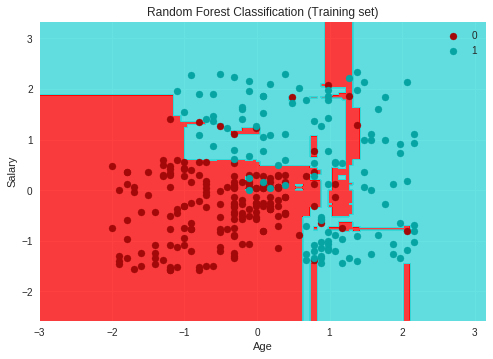

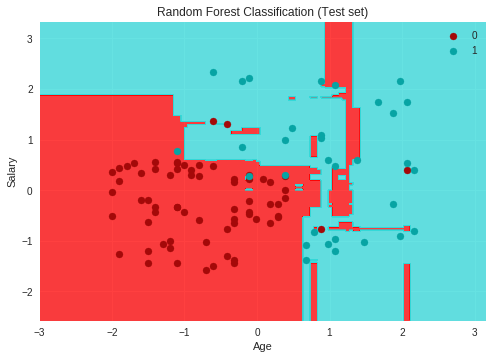

In [0]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', '#33D9D9')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#A40909', '#07A4A4'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()
 
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', '#33D9D9')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#A40909', '#07A4A4'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()



#  Clasificación de el dataset  iris usando Random Forest



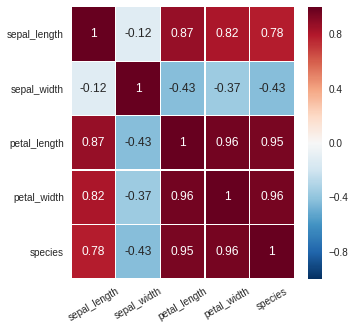

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib inline

iris = sns.load_dataset('iris')

#iris2 = pd.get_dummies(iris)
#iris2.head(3)

species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris3 = iris.copy()
iris3['species'] = iris['species'].map(species_mapping)
iris3.head(3)

plt.figure(figsize = (5, 5))
sns.heatmap(iris3.corr(), annot = True, linewidths = 0.1, linecolor = 'white')
plt.xticks(rotation = 30)
plt.show()

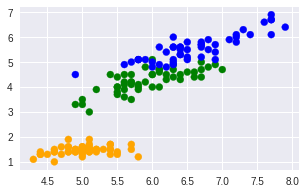

In [0]:
x = iris3['sepal_length']
y = iris3['petal_length']
target = iris3['species']

plt.figure(figsize = (5, 3))
plt.scatter(x = x, y = y, \
            c = [['orange', 'green', 'blue'][t] for t in target])
plt.show()

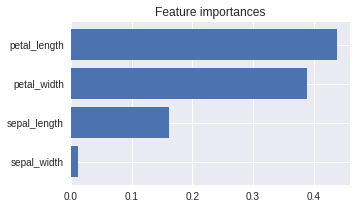

In [0]:
features = iris3.drop('species', axis = 1)
target = iris3['species']
feat_labels = features.columns

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(features, target, test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)
plt.figure(figsize = (5, 3))
plt.barh(y = range(len(indices)), width = importances[indices])
plt.yticks(range(len(indices)), feat_labels[indices])
plt.title('Feature importances')
plt.show()

accuracy: 0.9333333333333333


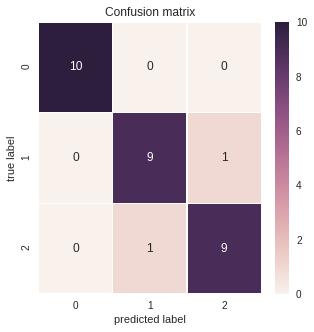

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = rf.predict(x_val)
acc = accuracy_score(y_true = y_val, y_pred = y_pred)
conf_mat = confusion_matrix(y_true = y_val, y_pred = y_pred)

print ('accuracy:', acc)

plt.figure(figsize = (5, 5))
sns.heatmap(conf_mat, annot = True, linewidths = 0.1, linecolor = 'white')
plt.title('Confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [0]:
from sklearn.grid_search import GridSearchCV

param_grid = [{'n_estimators': [10, 20], \
              'max_depth' : [2, 5], \
              'criterion' : ['gini']}, \
              {'n_estimators': [10, 20], \
              'max_depth' : [2, 5], \
              'criterion' :['entropy']}]


gs = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, \
                 scoring = 'accuracy')
gs.fit(x_train, y_train)

print (gs.best_score_)
print (gs.best_params_)

0.9583333333333334
{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}


# Clasificación la iris dataset utilizando diferentes modelos de clasificación



In [0]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [0]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]


In [0]:
# Necesario
!pip install mlxtend
###
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))



Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

### Graficando las regiones de decision

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


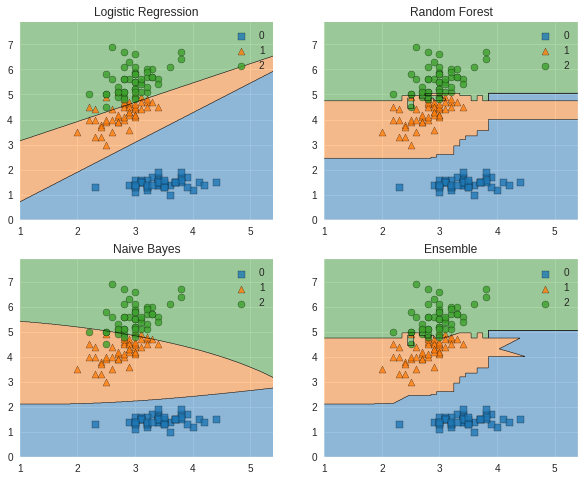

In [0]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

# Plot the decision surfaces of ensembles of trees on the iris dataset
## Grafica de las superficies de decisión de varios metodos entrenados en pares de características del set de datos.

Esta gráfica compara las superficies de decisión aprendidas por un clasificador de árbol de decisión (primera columna), por un clasificador de Random Forest (segunda columna), por un clasificador de árboles extra (tercera columna) y por un clasificador de AdaBoost (cuarta columna).

En la primera fila, los clasificadores se construyen utilizando las características de ancho de sépalo y longitud de sépalo solamente, en la segunda fila utilizando solo la longitud de pétalo y el largo de sépalo, y en la tercera fila utilizando solo el ancho de pétalo y la longitud de pétalo.


https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html#sphx-glr-auto-examples-ensemble-plot-forest-iris-py

DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.9266666666666666
AdaBoost with 30 estimators with features [0, 1] has a score of 0.84
DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [0, 2] has a score of 0.9933333333333333
DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [2, 3] has a score of 0.9933333333333333


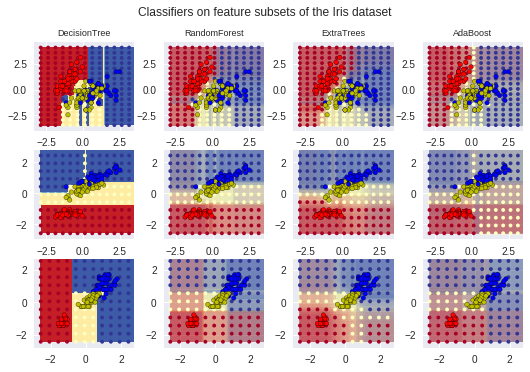

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()